In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import GridSearchCV
#import matplotlib as plt
from fastquant import get_stock_data 
from fastquant import backtest
from matplotlib import warnings
%matplotlib inline

In [2]:
price_df = get_stock_data('TSLA', '2018-01-01', '2021-12-31')
closing_price_df=price_df

[*********************100%***********************]  1 of 1 completed


In [3]:
starting_value = 1

In [4]:
results = backtest('smac', closing_price_df, fast_period=range(5,10,1), slow_period=range(10, 200, 50), verbose = False, plot =False)
results[['fast_period', 'slow_period', 'final_value']]

,fast_period,slow_period,final_value
0,8,10,1.768379e+06
1,7,10,1.316885e+06
2,6,160,1.309283e+06
3,7,160,1.299309e+06
4,8,160,1.298769e+06
5,9,160,1.296596e+06
6,5,160,1.250295e+06
7,6,10,1.026733e+06
8,9,10,9.481905e+05
9,6,110,8.751372e+05


In [5]:
def moving_avg_trading(ticker, start, end): #yyyy-mm-dd
    price_df = get_stock_data(ticker, start, end)
    results = backtest('smac', price_df, fast_period=range(5,10,1), slow_period=range(10, 200, 50), verbose = False, plot =False)
    results[['fast_period', 'slow_period', 'final_value']]  
    pnl = pd.DataFrame(results[['fast_period', 'slow_period', 'final_value']])
    pnl1=pnl
    display(price_df.head())
    display(pnl.head())
    display(pnl.plot(kind='scatter', x='fast_period', y='final_value', color='blue'))
    display(pnl1.plot(kind='scatter', x='slow_period', y='final_value', color='red'))

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume,dividend
dt,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000,0
2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500,0
2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500,0
2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000,0
2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000,0


,fast_period,slow_period,final_value
0,8,10,1.768379e+06
1,7,10,1.316885e+06
2,6,160,1.309283e+06
3,7,160,1.299309e+06
4,8,160,1.298769e+06


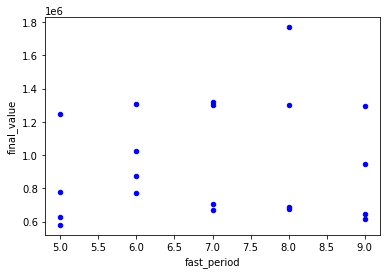

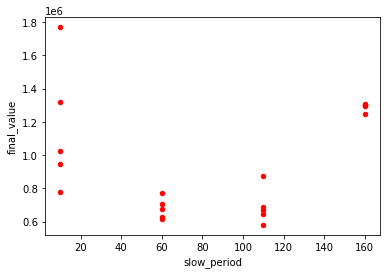

In [6]:
moving_avg_trading('tsla','2018-01-01', '2021-12-31')

In [ ]:
'------------------------------------------'

In [7]:
asset_data=closing_price_df

In [8]:
from fastquant import get_stock_data, backtest
symbol='TSLA'
asset_data = get_stock_data(symbol, 
                    start_date='2018-01-01', 
                    end_date='2021-06-30',
                    format='cv',
                   )
asset_data.head()

[*********************100%***********************]  1 of 1 completed


,close,volume
dt,,
2018-01-02,64.106003,21761000
2018-01-03,63.450001,22607500
2018-01-04,62.924000,49731500
2018-01-05,63.316002,22956000
2018-01-08,67.281998,49297000


In [9]:
import matplotlib.pyplot as pl
pl.style.use("default")

In [10]:
'''
from fastquant import backtest

results = backtest("smac", 
                   asset_data, 
                   fast_period=15, 
                   slow_period=40, 
                   verbose=False, 
                   plot=True
                  )
results.head()
''''

SyntaxError: EOL while scanning string literal (Temp/ipykernel_10440/1683900359.py, line 12)

In [11]:
import numpy as np

fast_periods = np.arange(1,10,1, dtype=int)
slow_periods = np.arange(10,100,10, dtype=int)

#creating a grid of 0's (placeholder)
period_grid = np.zeros(shape=(len(fast_periods),len(slow_periods)))
period_grid.shape


(9, 9)

In [12]:
#iterate through multiple trading windows 


init_cash=0
for i,fast_period in enumerate(fast_periods): 
    for j,slow_period in enumerate(slow_periods):
        results = backtest('smac', 
                           asset_data, 
                           fast_period=fast_period,
                           slow_period=slow_period,
                           init_cash=100000,
                           verbose=False, 
                           plot=False
                          )
        net_profit = results.final_value.values[0]-init_cash
        period_grid[i,j] = net_profit


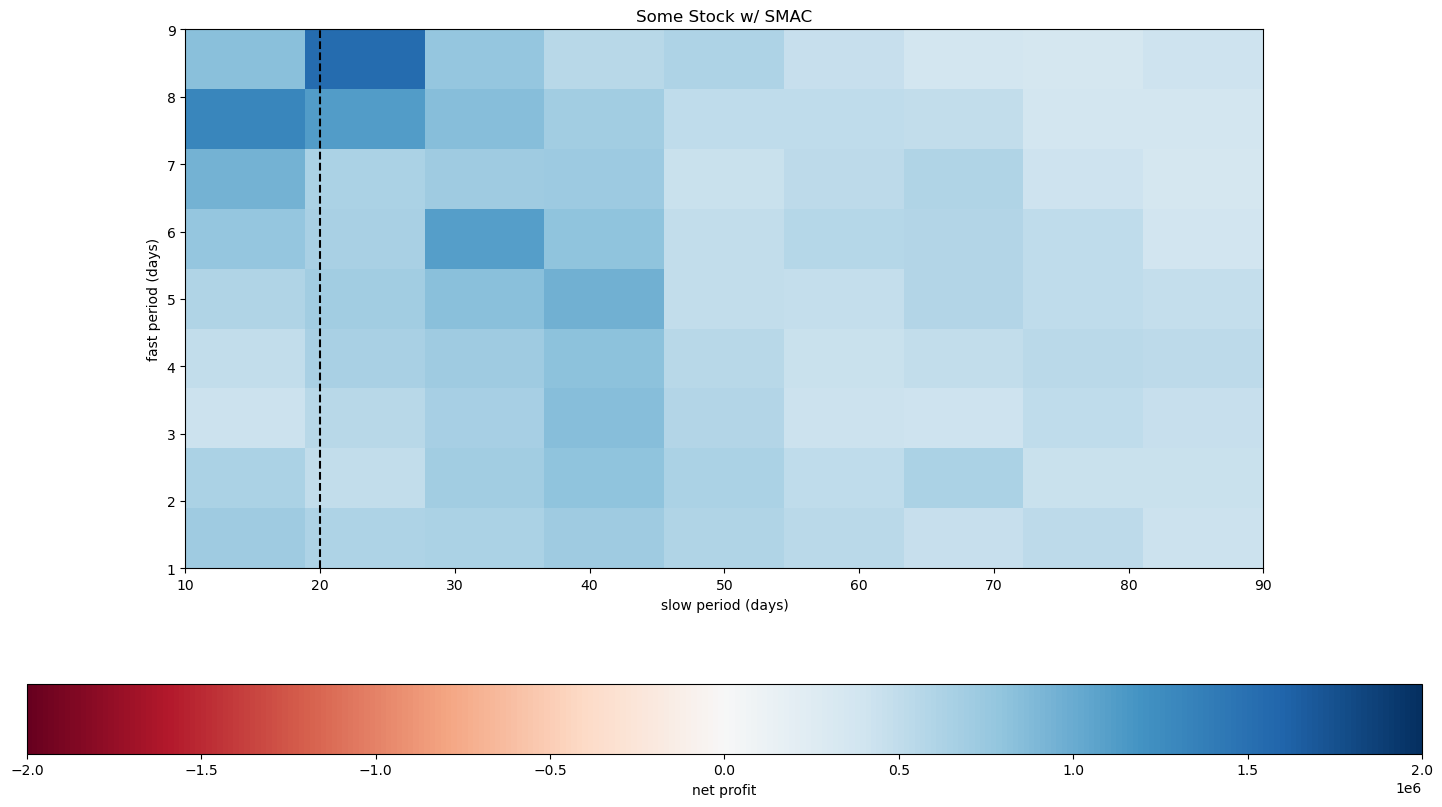

In [13]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as pl
pl.style.use("default")

fig, ax = pl.subplots(1,1, figsize=(20,10))
xmin, xmax = slow_periods[0],slow_periods[-1]
ymin, ymax = fast_periods[0],fast_periods[-1]

#make a diverging color map such that profit<0 is red and blue otherwise
cmap = pl.get_cmap('RdBu')
norm = mcolors.DivergingNorm(vmin=-2000000,
                             vmax = 2000000,
                             vcenter=0
                            )
#plot matrix
cbar = ax.imshow(period_grid, 
                 origin='lower', 
                 interpolation='none', 
                 extent=[xmin, xmax, ymin, ymax], 
                 cmap=cmap,
                 norm=norm
                )
pl.colorbar(cbar, ax=ax, shrink=0.9,
            label='net profit', orientation="horizontal")

# search position with highest net profit
y, x = np.unravel_index(np.argmax(period_grid), period_grid.shape)
best_slow_period = slow_periods[x]
best_fast_period = fast_periods[y]
# mark position
# ax.annotate(f"max profit={period_grid[y, x]:.0f}@({best_slow_period}, {best_fast_period}) days", 
#             (best_slow_period+5,best_fast_period+1)
#            )
ax.axvline(best_slow_period, 0, 1, c='k', ls='--')
ax.axhline(best_fast_period+0.5, 0, 1, c='k', ls='--')

# add labels
ax.set_aspect(5)
pl.setp(ax,
        xlim=(xmin,xmax),
        ylim=(ymin,ymax),
        xlabel='slow period (days)',
        ylabel='fast period (days)',
        title='Some Stock w/ SMAC',
       );

In [14]:
symbol='TSLA'
asset_data = get_stock_data(symbol, 
                    start_date='2018-01-01', 
                    end_date='2021-12-30',
                    format='cv',
                   )
asset_data.tail()

[*********************100%***********************]  1 of 1 completed


,close,volume
dt,,
2021-12-22,1008.869995,31211400
2021-12-23,1067.000000,30904400
2021-12-27,1093.939941,23715300
2021-12-28,1088.469971,20108000
2021-12-29,1086.189941,18718000


In [15]:
#Using An SVM Model 

from sklearn import svm

In [16]:
long_window = 15
short_window=9
ml_data = asset_data.copy()

ml_data['actual_returns'] = ml_data['close'].pct_change()
ml_data['sma_slow']= ml_data['close'].rolling(window=long_window).mean()
ml_data['sma_fast']= ml_data['close'].rolling(window=short_window).mean()

ml_data= ml_data.dropna()

In [17]:
X = ml_data[['sma_fast', 'sma_slow']].shift().dropna().copy()
display(X.head())
display(X.tail())

,sma_fast,sma_slow
dt,,
2018-01-24,68.780666,67.122800
2018-01-25,69.027111,67.460933
2018-01-26,69.020222,67.732800
2018-01-29,69.167555,68.109200
2018-01-30,69.377999,68.548533


,sma_fast,sma_slow
dt,,
2021-12-22,957.744446,996.265995
2021-12-23,958.307780,990.523995
2021-12-27,963.859999,989.350663
2021-12-28,978.029995,994.615328
2021-12-29,992.469991,999.912659


In [19]:
ml_data['signal']=0.0
ml_data.loc[(ml_data['actual_returns'] >= 0), 'signal'] = 1
ml_data.loc[(ml_data['actual_returns'] < 0), 'signal'] = -1
ml_data.head()

,close,volume,actual_returns,sma_slow,sma_fast,signal
dt,,,,,,
2018-01-23,70.557999,27327000,0.003499,67.122800,68.780666,1.0
2018-01-24,69.178001,26437500,-0.019558,67.460933,69.027111,-1.0
2018-01-25,67.528000,33701500,-0.023852,67.732800,69.020222,-1.0
2018-01-26,68.570000,22697000,0.015431,68.109200,69.167555,1.0
2018-01-29,69.905998,23735500,0.019484,68.548533,69.377999,1.0


In [20]:
y=ml_data['signal'].copy()

In [21]:
from pandas.tseries.offsets import DateOffset
training_begin = X.index.min()
training_end = X.index.min() + DateOffset(months =41)
display(training_begin)
display(training_end)

Timestamp('2018-01-24 00:00:00')

Timestamp('2021-06-24 00:00:00')

In [22]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [23]:
X_test=X.loc[training_end:]
y_test = y.loc[training_end:]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [25]:
from sklearn import svm
svm_model=svm.SVC()

In [26]:
svm_model = svm_model.fit(X_train_scaled, y_train)

In [27]:
training_signal_predictions = svm_model.predict(X_train_scaled)

In [28]:
training_signal_predictions[:15]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
from sklearn.metrics import classification_report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.57      0.05      0.09       416
         1.0       0.52      0.96      0.68       445

    accuracy                           0.52       861
   macro avg       0.54      0.51      0.38       861
weighted avg       0.54      0.52      0.39       861



In [30]:
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [31]:
testing_report = classification_report(y_test, testing_signal_predictions)
print(testing_report)


              precision    recall  f1-score   support

        -1.0       0.31      0.32      0.32        53
         1.0       0.53      0.53      0.53        78

    accuracy                           0.44       131
   macro avg       0.42      0.42      0.42       131
weighted avg       0.44      0.44      0.44       131



In [32]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = ml_data["actual_returns"]
predictions_df["trading_algorithm_returns"] = (predictions_df["actual_returns"] * predictions_df["predicted_signal"])

predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
dt,,,
2021-06-24,1.0,0.035411,0.035411
2021-06-25,1.0,-0.011694,-0.011694
2021-06-28,1.0,0.025079,0.025079
2021-06-29,1.0,-0.011558,-0.011558
2021-06-30,1.0,-0.001557,-0.001557


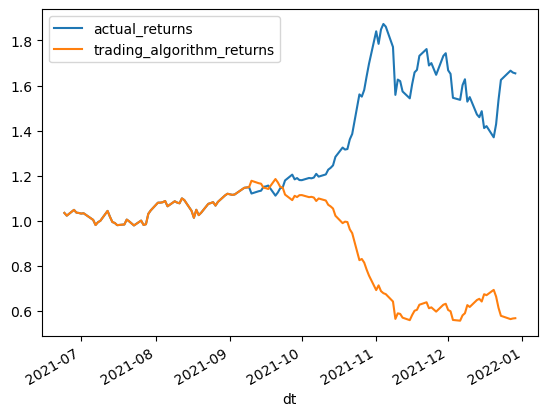

In [33]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

In [35]:
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
predictions = logistic_regression_model.predict(X_train_scaled)

In [37]:
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
dt,,
2018-01-24,1.0,-1.0
2018-01-25,1.0,-1.0
2018-01-26,1.0,1.0
2018-01-29,1.0,1.0
2018-01-30,1.0,-1.0
...,...,...
2021-06-18,1.0,1.0
2021-06-21,1.0,-1.0
2021-06-22,1.0,1.0


In [38]:
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": y_test})
results_df

,Testing Data Predictions,Testing Data Actual Targets
dt,,
2021-06-24,1.0,1.0
2021-06-25,1.0,-1.0
2021-06-28,1.0,1.0
2021-06-29,1.0,-1.0
2021-06-30,1.0,-1.0
...,...,...
2021-12-22,-1.0,1.0
2021-12-23,1.0,1.0
2021-12-27,1.0,1.0


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(testing_predictions, y_test)

0.5801526717557252